# Projeto: Análise estatística de Máquinas Virtuais ociosas

## Instalação de dependências:

In [ ]:
import subprocess


def install_dependencies():
    subprocess.run(['pip', 'install', 'numpy'])
    subprocess.run(['pip', 'install', 'scipy'])
    subprocess.run(['pip', 'install', 'matplotlib'])
    subprocess.run(['pip', 'install', 'pandas'])
    subprocess.run(['pip', 'install', 'seaborn'])

install_dependencies()

## Importação de bibliotecas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.stats import normaltest, probplot
import seaborn as sns

## Leitura da base de dados:

In [31]:
df_maquinas_ociosas = pd.read_csv('docs/maquinas_ociosas.csv')
df_maquinas_ociosas['media'] = df_maquinas_ociosas.mean(axis=1)
df_maquinas_ociosas['media'] = round(df_maquinas_ociosas['media'], 2)
dados = df_maquinas_ociosas["media"]

## Teste de Hipótesa para distribuição Normal:

Com significância de 5%, é possível afirmar que os dados são normalmente distribuídos


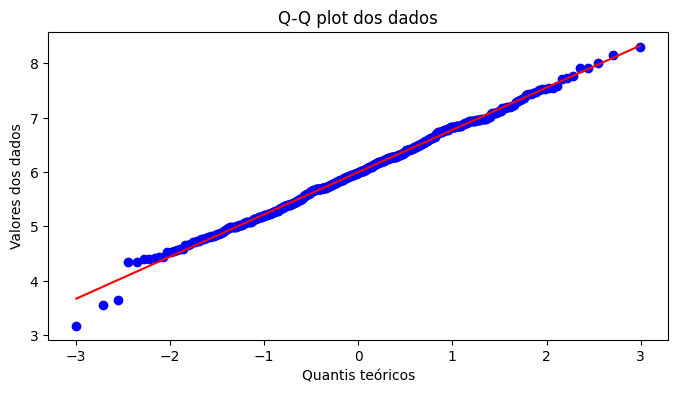

In [32]:
def normal_hypothesis_test(data):
   
    stat, p = normaltest(data)
    return stat, p


def qq_plot(data):

    fig, ax = plt.subplots(figsize=(8, 4))
    probplot(data, plot=ax)

    # Definir título e rótulos dos eixos
    ax.set_title("Q-Q plot dos dados")
    ax.set_xlabel("Quantis teóricos")
    ax.set_ylabel("Valores dos dados")

    plt.show()


def analisar_normalidade(dados):
   
    # Teste de hipótese para distribuição normal
    stat, p_value = normal_hypothesis_test(dados)
    alpha = 0.05

    if p_value > alpha:
        print(f'Com significância de 5%, é possível afirmar que os dados são normalmente distribuídos')
    else:
        print(f'Ao nível de significância de 5%, não é possível confirmar que os dados são normalmente distribuídos')

    # Q-Q plot
    qq_plot(dados)

analisar_normalidade(dados)

## Boxplot:

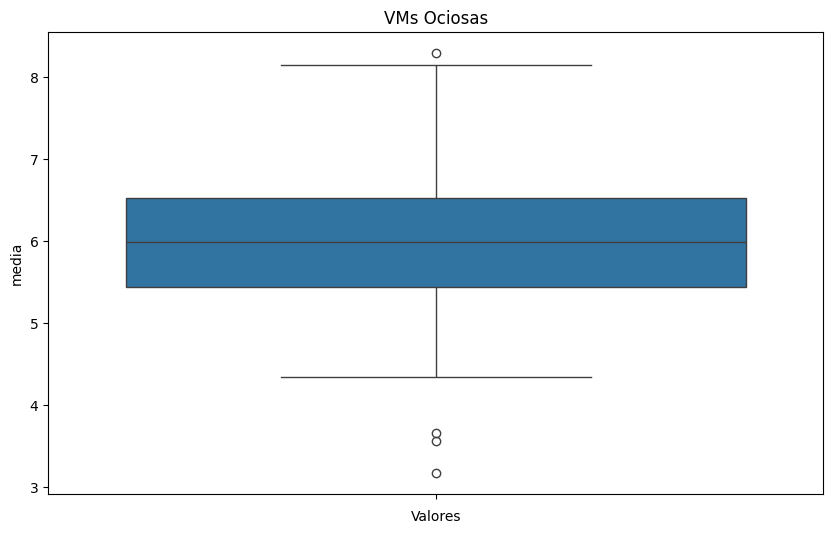

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados)
plt.title('VMs Ociosas')
plt.xlabel('Valores')
plt.show()

## Histograma:

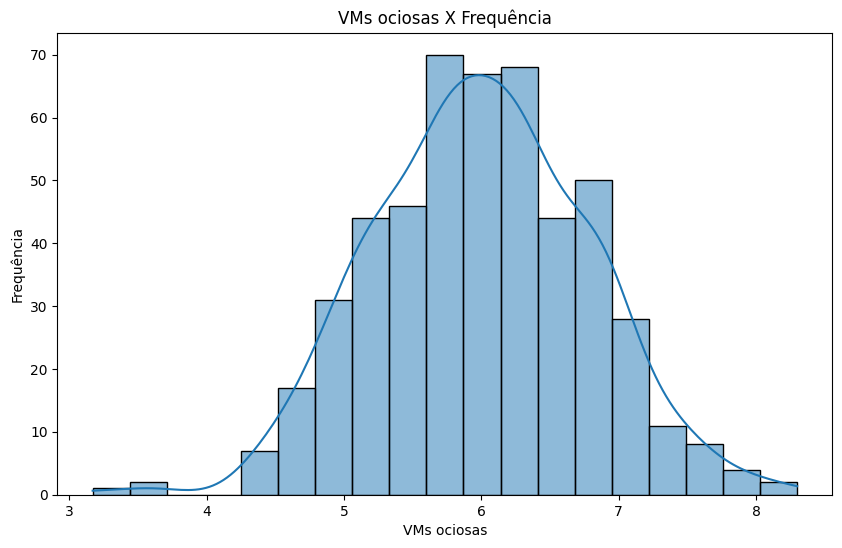

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dados, kde=True)
plt.title('VMs ociosas X Frequência')
plt.xlabel('VMs ociosas')
plt.ylabel('Frequência')
plt.show()

## Análise Descritiva de medidas de tendência central e distribuição:

In [40]:
def medidas_centrais(dados):

    medidas = {}
    
    # Média
    medidas['media'] = dados.mean()
    
    # Mediana
    medidas['mediana'] = dados.median()
    
    # Moda
    moda = dados.mode()

    medidas['moda(s)'] = moda.values.tolist()

    
    # Desvio padrão
    medidas['desvio_padrao'] = dados.std()
    
    # Variância
    medidas['variancia'] = dados.var()
    
    # Coeficiente de variação
    medidas['coeficiente_variacao'] = (dados.std() / dados.mean()) * 100
    
    # Quartis
    quartis = np.percentile(dados, [25, 50, 75])
    medidas['primeiro_quartil'] = quartis[0]
    medidas['segundo_quartil'] = quartis[1]
    medidas['terceiro_quartil'] = quartis[2]
    
    # Curtose
    medidas['curtose'] = dados.kurtosis()
    
    return medidas


# Obtendo as medidas centrais
medidas = medidas_centrais(dados)
for chave, valor in medidas.items():
    print(f'{chave}: {valor}')

media: 5.995839999999999
mediana: 5.985
moda(s): [5.69, 5.7, 6.27, 6.4, 6.84]
desvio_padrao: 0.7760306317942391
variancia: 0.602223541482966
coeficiente_variacao: 12.942817550072036
primeiro_quartil: 5.4375
segundo_quartil: 5.985
terceiro_quartil: 6.5225
curtose: 0.08692593408324312


## Determinação das Datas da sequência:

In [9]:
# Determina a data inicial e a data final
data_inicial = datetime(2014, 8, 1)  
data_final = datetime.now()

# Cria uma sequência de datas com intervalos de 7 dias
datas = pd.date_range(start=data_inicial, end=data_final, freq='7D')
datas = datas[:len(df_maquinas_ociosas)]

# Adiciona a coluna de datas ao DataFrame e formate as datas
df_maquinas_ociosas['Datas'] = datas.strftime('%d/%m/%Y')
print(df_maquinas_ociosas)

     media       Datas
0     6.28  01/08/2014
1     5.28  08/08/2014
2     6.84  15/08/2014
3     5.09  22/08/2014
4     5.06  29/08/2014
..     ...         ...
495   7.91  26/01/2024
496   5.84  02/02/2024
497   3.65  09/02/2024
498   5.66  16/02/2024
499   5.96  23/02/2024

[500 rows x 2 columns]


## Gráfico de médias ao longo do tempo:

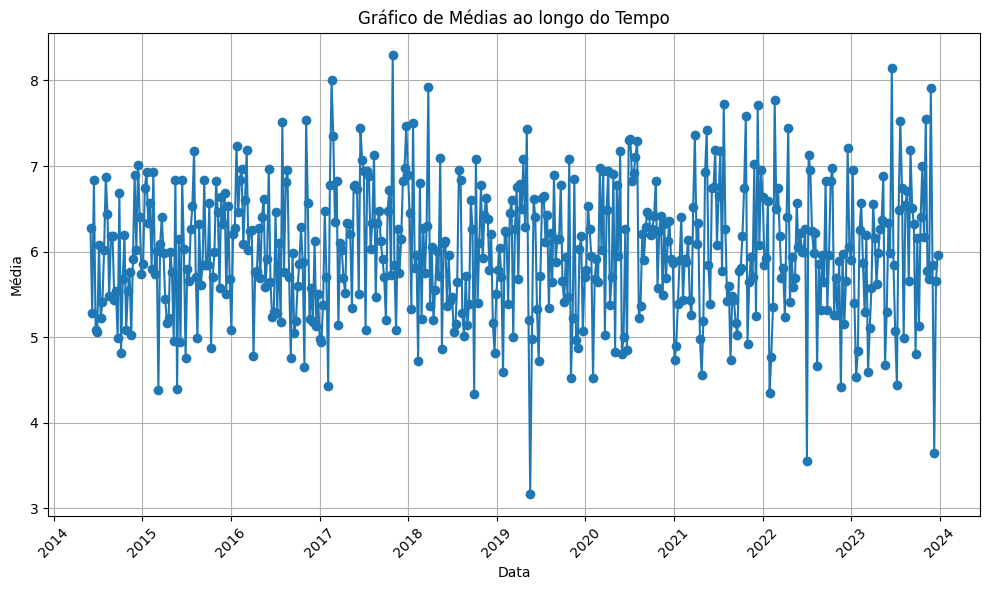

In [42]:
# Determina a data inicial e a data final
data_inicial = datetime(2014, 6, 1)  # Escolha uma data que represente 
data_final = datetime.now()

# Cria uma sequência de datas com intervalos de 15 dias
datas = pd.date_range(start=data_inicial, end=data_final, freq='7D')

datas = datas[:len(df_maquinas_ociosas)]
df_maquinas_ociosas['Datas'] = datas

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_maquinas_ociosas['Datas'], df_maquinas_ociosas['media'], marker='o', linestyle='-')
plt.title('Gráfico de Médias ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Média')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

## Distribuição temporal em relação aos quartis:

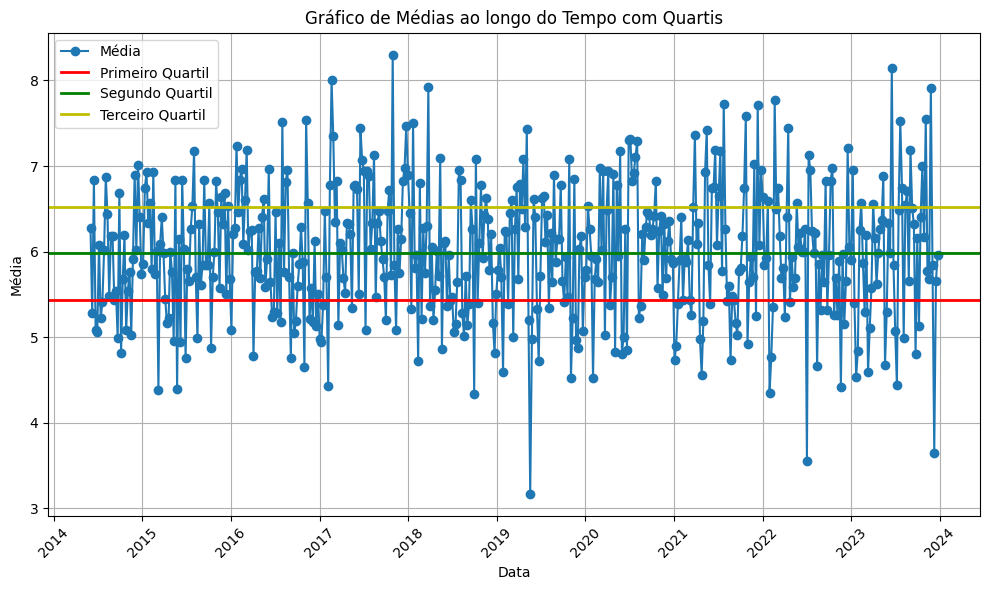

In [44]:
# Calcula os quartis
quartis = df_maquinas_ociosas['media'].quantile([0.25, 0.5, 0.75])

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_maquinas_ociosas['Datas'], df_maquinas_ociosas['media'], marker='o', linestyle='-', label='Média')
plt.axhline(quartis[0.25], color='r', linestyle='-', linewidth=2, label='Primeiro Quartil')
plt.axhline(quartis[0.5], color='g', linestyle='-', linewidth=2, label='Segundo Quartil')
plt.axhline(quartis[0.75], color='y', linestyle='-', linewidth=2, label='Terceiro Quartil')
plt.title('Gráfico de Médias ao longo do Tempo com Quartis')
plt.xlabel('Data')
plt.ylabel('Média')
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Gráficos de tendências anuais:

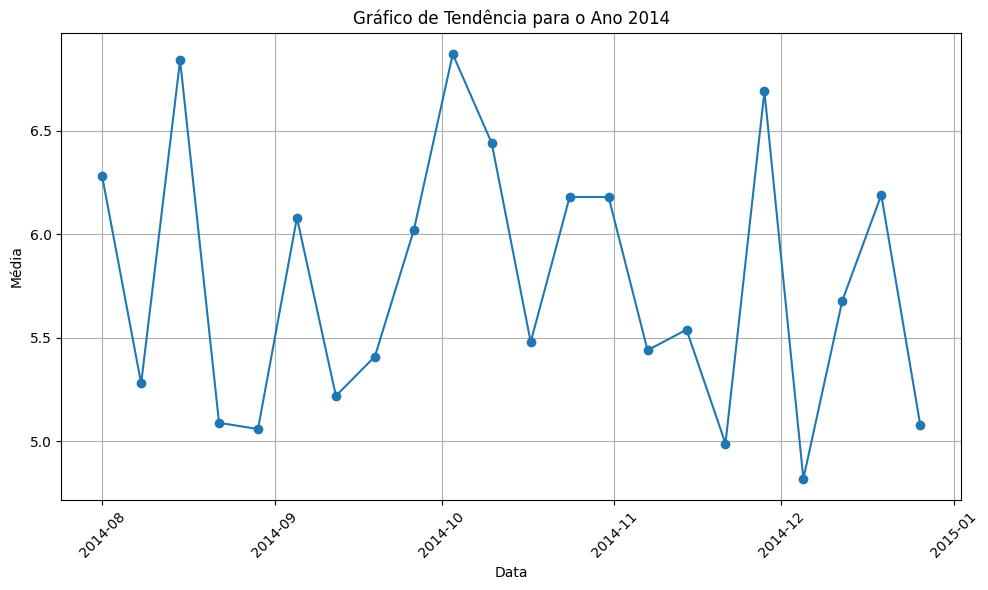

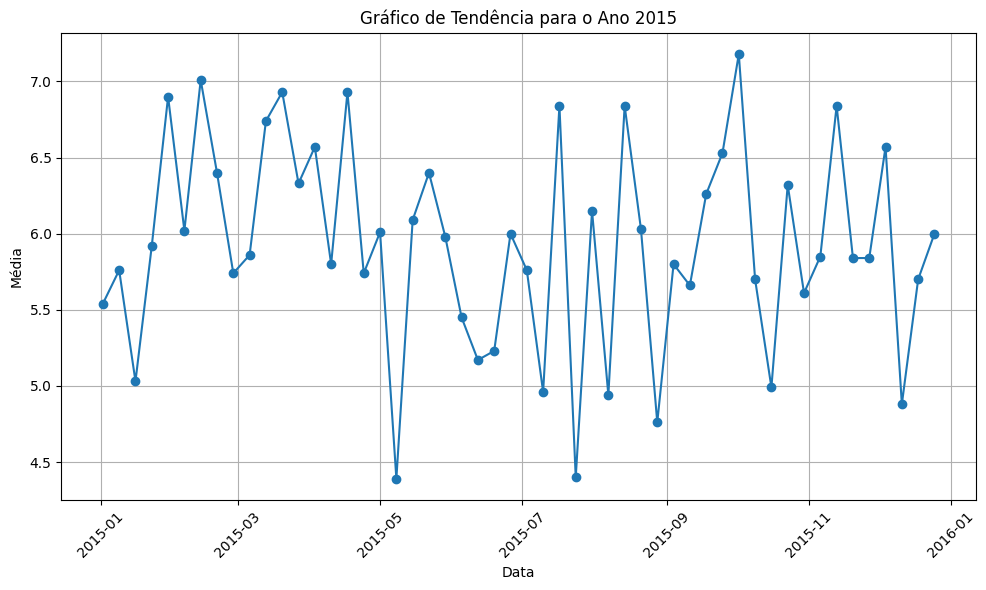

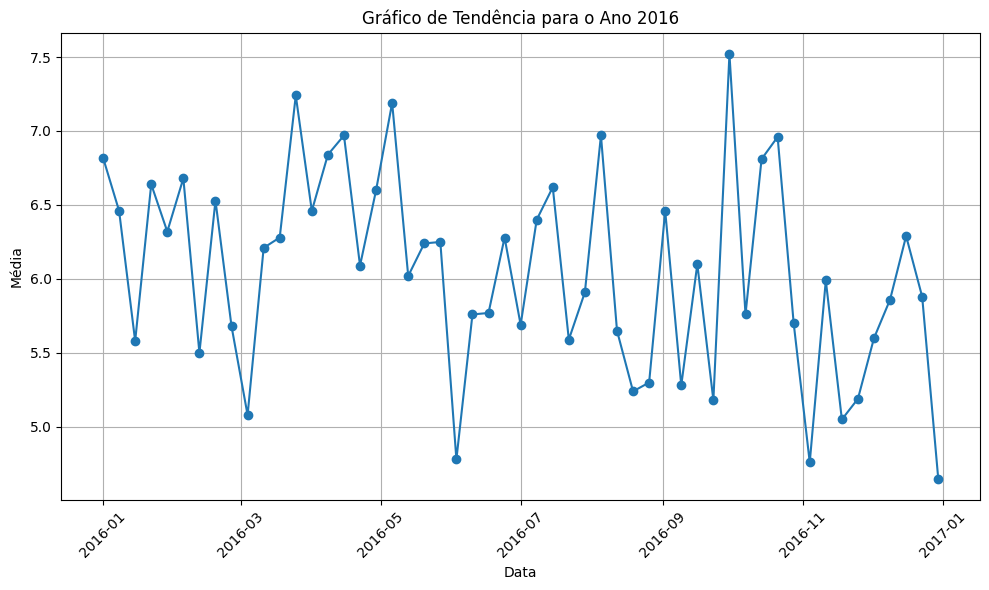

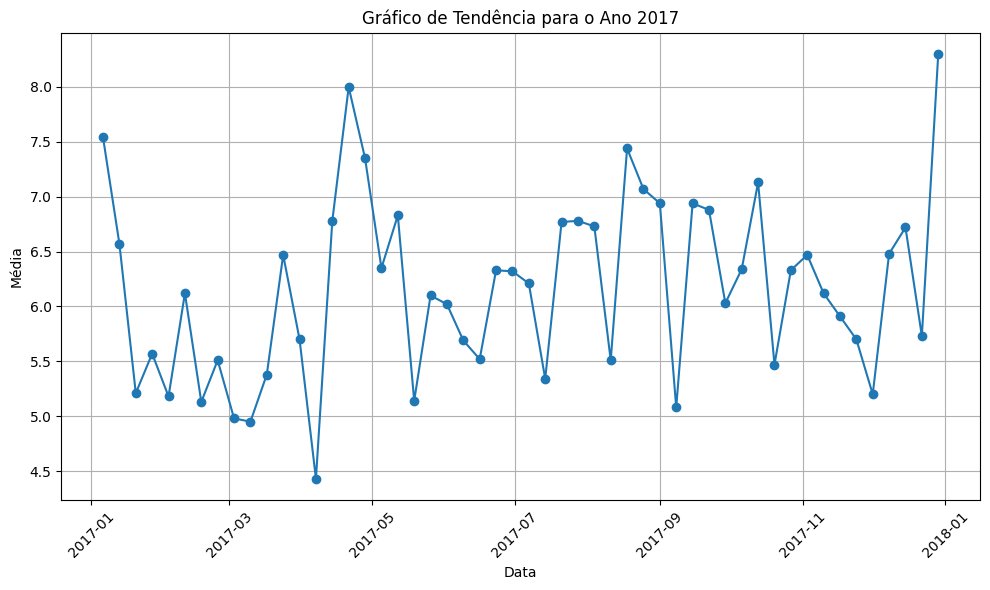

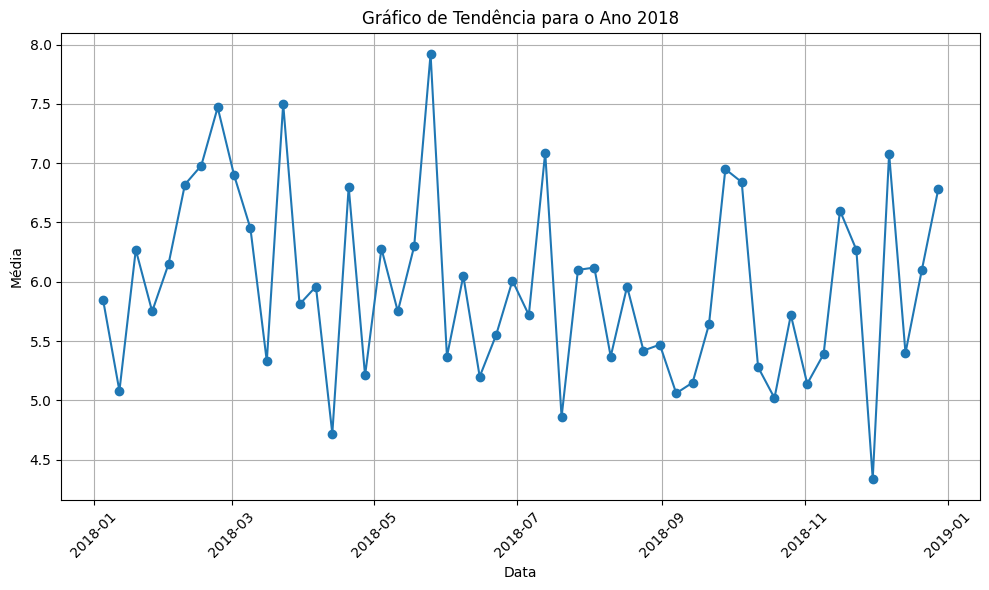

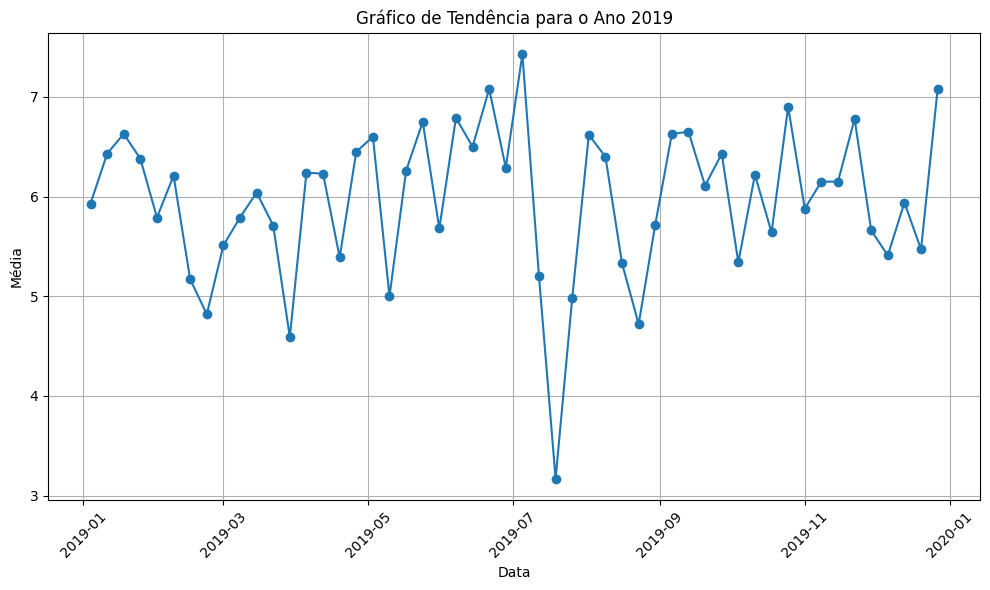

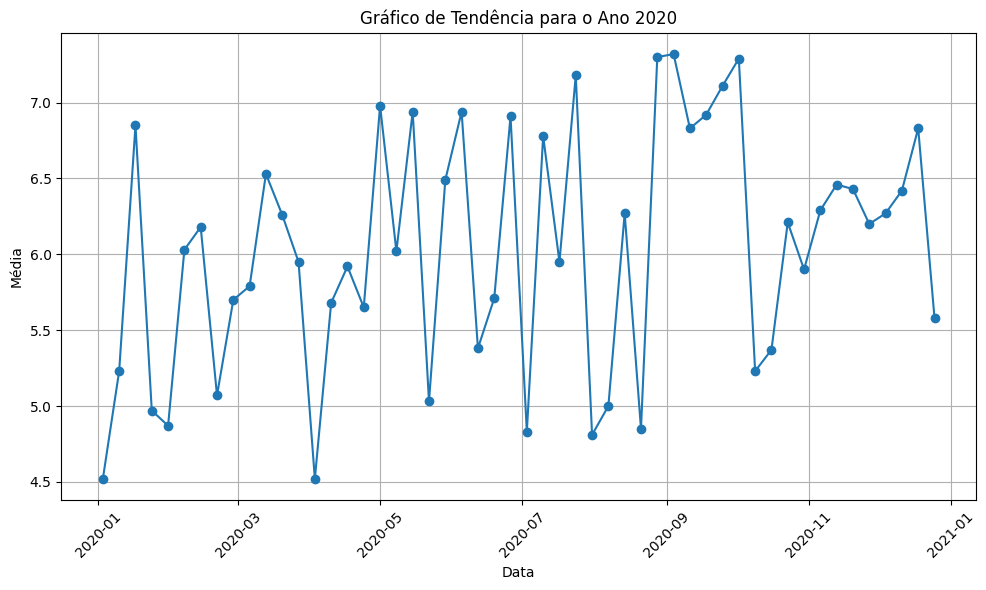

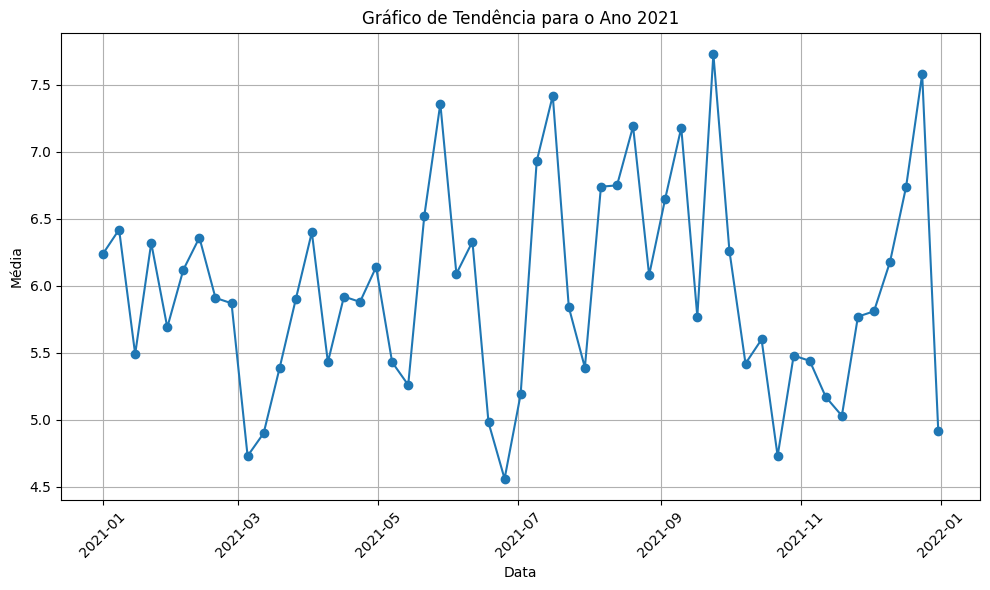

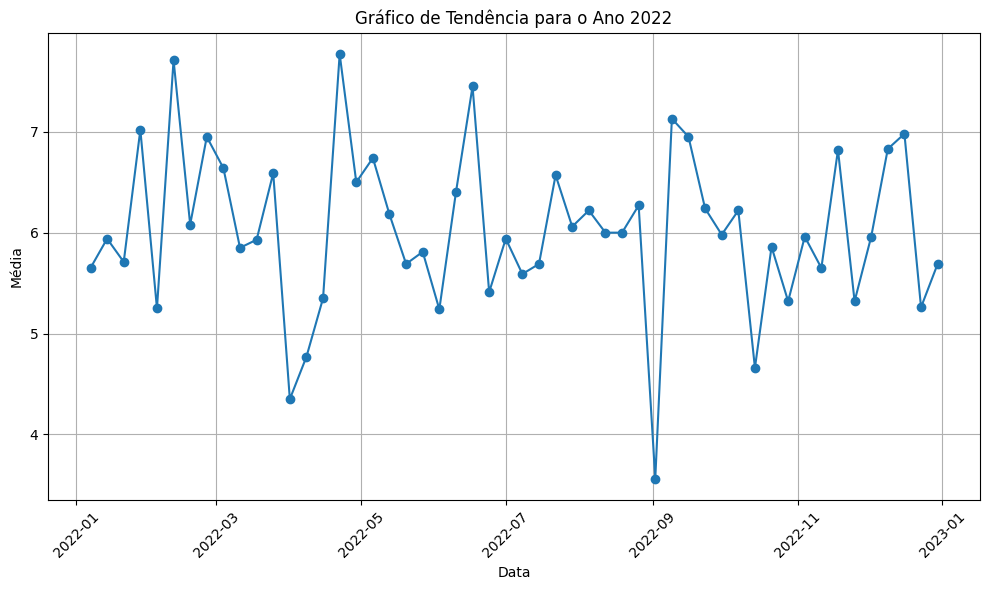

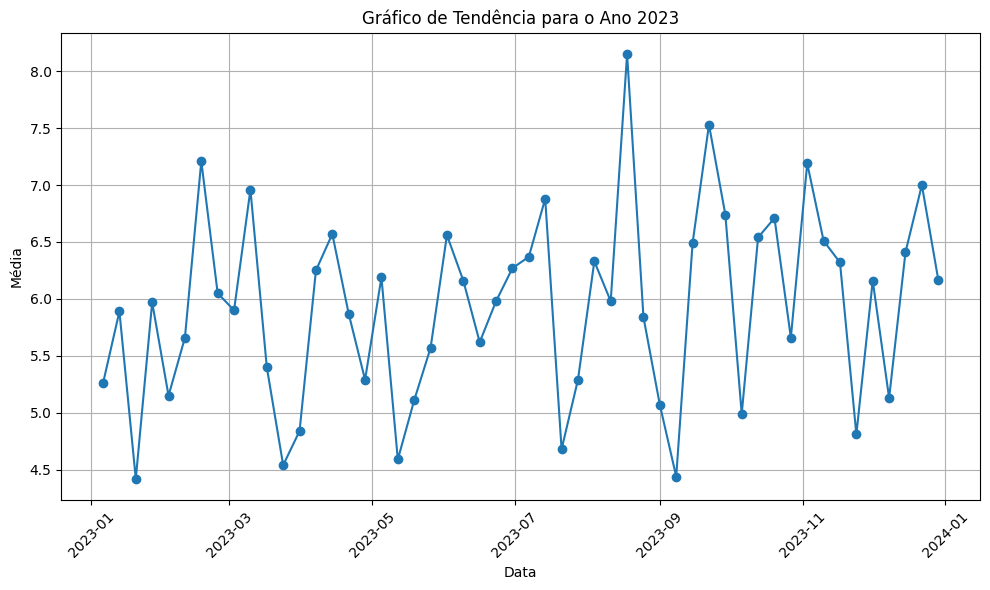

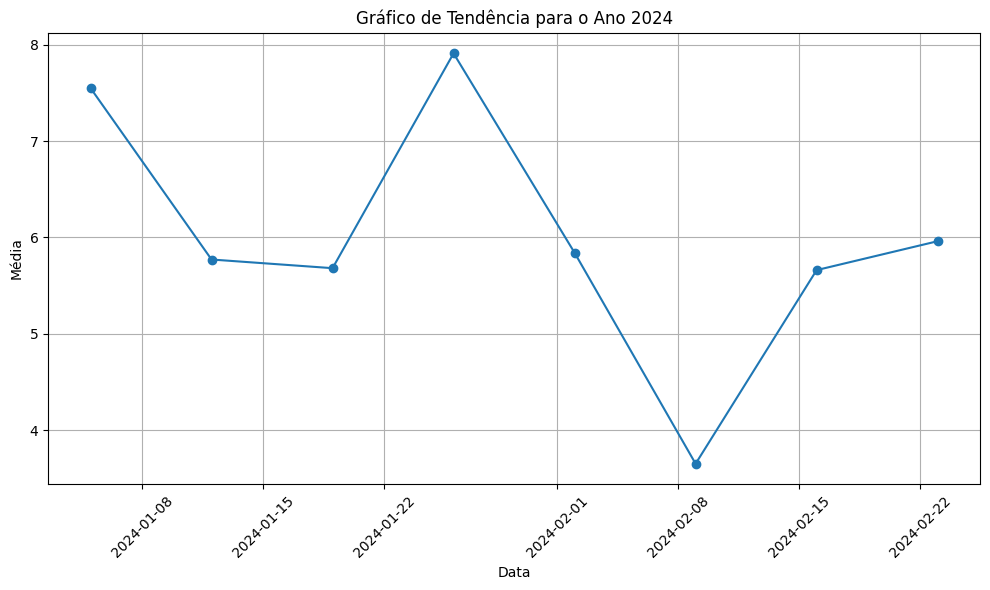

In [46]:
# Determina a data inicial e a data final
data_inicial = datetime(2014, 8, 1)
data_final = datetime.now()

# Cria uma sequência de datas com intervalos de 7 dias
datas = pd.date_range(start=data_inicial, end=data_final, freq='7D')
datas = datas[:len(df_maquinas_ociosas)]

# Adiciona a coluna de datas ao DataFrame e formata as datas
df_maquinas_ociosas['Datas'] = datas
df_maquinas_ociosas['Ano'] = df_maquinas_ociosas['Datas'].dt.year

# Agrupa por ano e plota gráficos de tendência
anos = df_maquinas_ociosas['Ano'].unique()
for ano in anos:
    df_ano = df_maquinas_ociosas[df_maquinas_ociosas['Ano'] == ano]
    plt.figure(figsize=(10, 6))
    plt.plot(df_ano['Datas'], df_ano['media'], marker='o', linestyle='-')
    plt.title(f'Gráfico de Tendência para o Ano {ano}')
    plt.xlabel('Data')
    plt.ylabel('Média')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Gráfico de tendência para todos os anos:

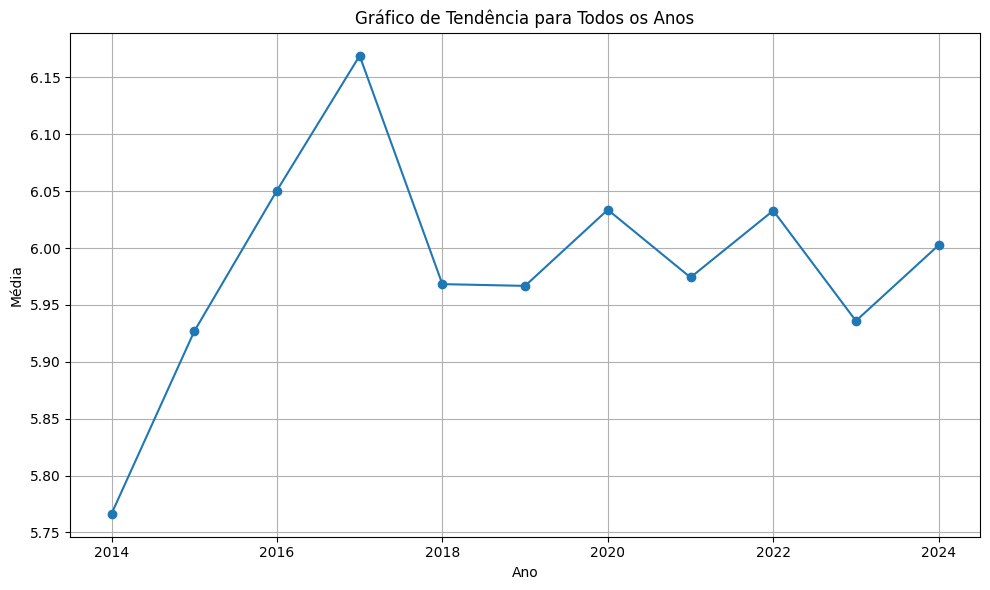

In [13]:
# Determina a data inicial e a data final
data_inicial = datetime(2014, 8, 1)
data_final = datetime.now()

# Cria uma sequência de datas com intervalos de 7 dias
datas = pd.date_range(start=data_inicial, end=data_final, freq='7D')
datas = datas[:len(df_maquinas_ociosas)]

# Adiciona a coluna de datas ao DataFrame e formata as datas
df_maquinas_ociosas['Datas'] = datas
df_maquinas_ociosas['Ano'] = df_maquinas_ociosas['Datas'].dt.year

# Agrupando por ano e calculando a média
media_por_ano = df_maquinas_ociosas.groupby('Ano')['media'].mean()

# Plotando o gráfico de tendência para todos os anos
plt.figure(figsize=(10, 6))
plt.plot(media_por_ano.index, media_por_ano.values, marker='o', linestyle='-')
plt.title('Gráfico de Tendência para Todos os Anos')
plt.xlabel('Ano')
plt.ylabel('Média')
plt.grid(True)
plt.tight_layout()
plt.show()

## Média de Máquinas ociosas por mês:

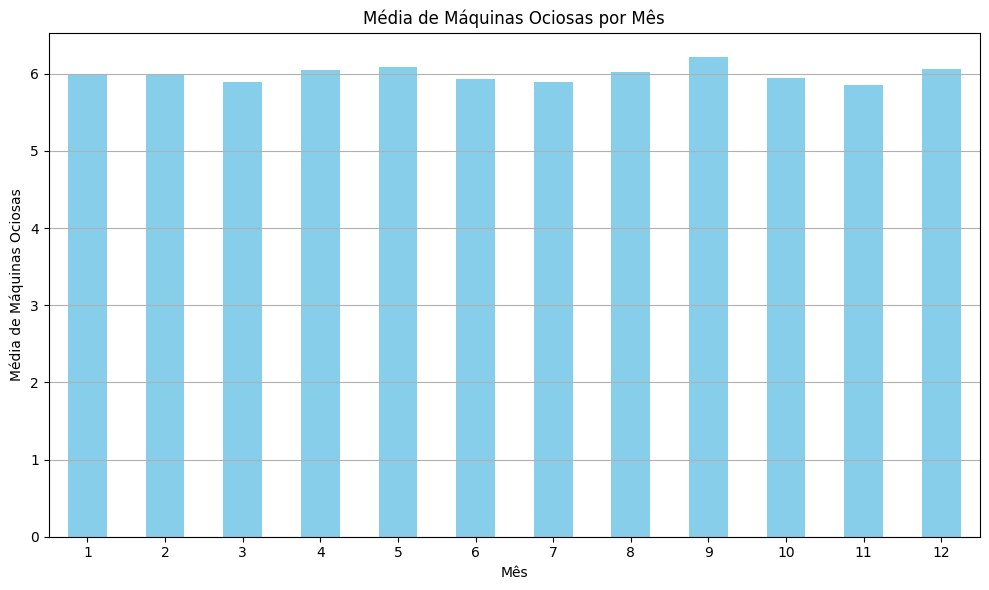

In [14]:
# Determina a data inicial e a data final
data_inicial = datetime(2014, 8, 1)
data_final = datetime.now()

# Cria uma sequência de datas com intervalos de 7 dias
datas = pd.date_range(start=data_inicial, end=data_final, freq='7D')
datas = datas[:len(df_maquinas_ociosas)]

# Adiciona a coluna de datas ao DataFrame e formata as datas
df_maquinas_ociosas['Datas'] = datas
df_maquinas_ociosas['Mês'] = df_maquinas_ociosas['Datas'].dt.month

# Agrupa por mês e calcula a média
media_por_mes = df_maquinas_ociosas.groupby('Mês')['media'].mean()

# Plota o gráfico 
plt.figure(figsize=(10, 6))
media_por_mes.plot(kind='bar', color='skyblue')
plt.title('Média de Máquinas Ociosas por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Máquinas Ociosas')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()